# Проект "Основы работы с данными для ИИ"

In [319]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Загрузка и первичный обзор

In [320]:
file_csv = pd.read_csv("google_books_dataset.csv")
df = pd.DataFrame(
    file_csv, columns=['book_id', 'title', 'subtitle', 'authors', 'publisher', 'published_date', 'description', 'page_count', 'categories',\
                 'average_rating', 'language', 'preview_link', 'info_link', 'isbn_13', 'isbn_10', 'list_price', 'currency', 'buyable', 'search_category', 'thumbnail'])
print(df.head(5))
print(df.tail(5))
print() # Для пробела между строками

print(f'Размер датасета: {df.shape}')
print()

print('Информация о датасете')
print(df.info())
print()

print('Типы данных')
print(df.dtypes)
print()

print("Статистика числовых столбцов")
print(df.describe())
print()


        book_id                                    title  \
0  LR_VDQAAQBAJ                              Bestsellers   
1  WcjTDQAAQBAJ                              Bestsellers   
2  4fXUDAAAQBAJ                      The Bestseller Code   
3  yIVuDwAAQBAJ                               Bestseller   
4  2JHXwAEACAAJ  Bestsellers: Popular Fiction since 1900   

                                            subtitle  \
0  The Path (bestsellers, free bestsellers, bests...   
1  Hell: A Place Without Hope (bestseller books, ...   
2                   Anatomy of the Blockbuster Novel   
3              A Century of America's Favorite Books   
4                                                NaN   

                            authors                  publisher published_date  \
0            Ivan King, bestsellers                bestsellers     2017-01-04   
1            Ivan King, bestsellers                bestsellers     2017-01-03   
2  Jodie Archer, Matthew L. Jockers                  Macmil

## Обработка данных

In [321]:
print(df.isnull()) # до обработки

       book_id  title  subtitle  authors  publisher  published_date  \
0        False  False     False    False      False           False   
1        False  False     False    False      False           False   
2        False  False     False    False      False           False   
3        False  False     False    False      False           False   
4        False  False      True    False      False           False   
...        ...    ...       ...      ...        ...             ...   
15142    False  False      True     True       True           False   
15143    False  False      True    False      False           False   
15144    False  False      True     True       True           False   
15145    False  False      True    False       True           False   
15146    False  False      True     True       True           False   

       description  page_count  categories  average_rating  language  \
0            False       False       False            True     False   
1  

In [322]:
print(df.isnull().sum()) # Количество пропусков по столбцам

book_id                0
title                  8
subtitle            9164
authors             3525
publisher           8057
published_date       214
description         6796
page_count           214
categories          2452
average_rating     14290
language               0
preview_link           0
info_link              0
isbn_13             7764
isbn_10             8026
list_price         12204
currency           12204
buyable                0
search_category        0
thumbnail            669
dtype: int64


In [323]:
# Заполнение пропусков
df=df.dropna(subset=['title'])

df['subtitle']=df['subtitle'].fillna('None')
df['authors']=df['authors'].fillna('None')
df['publisher']=df['publisher'].fillna('None')
df['published_date']=df['published_date'].fillna('None')
df['description']=df['description'].fillna('None')
df['thumbnail']=df['thumbnail'].fillna('None')
df['isbn_13']=df['isbn_13'].fillna('None')
df['isbn_10']=df['isbn_10'].fillna('None')
df['average_rating']=df['average_rating'].fillna('None')

df['page_count']=df['page_count'].fillna(df['page_count'].median())
df['list_price']=df['list_price'].fillna(df['list_price'].median())

df['categories']=df['categories'].fillna('None')

# df=df.drop('average_rating', axis=1)
df=df.drop('currency', axis=1)

In [324]:
print(df.isnull().sum()) # Проверка пропусков после преобразований

book_id            0
title              0
subtitle           0
authors            0
publisher          0
published_date     0
description        0
page_count         0
categories         0
average_rating     0
language           0
preview_link       0
info_link          0
isbn_13            0
isbn_10            0
list_price         0
buyable            0
search_category    0
thumbnail          0
dtype: int64


In [325]:
print(df.duplicated().sum())

0


Text(0, 0.5, 'Цена')

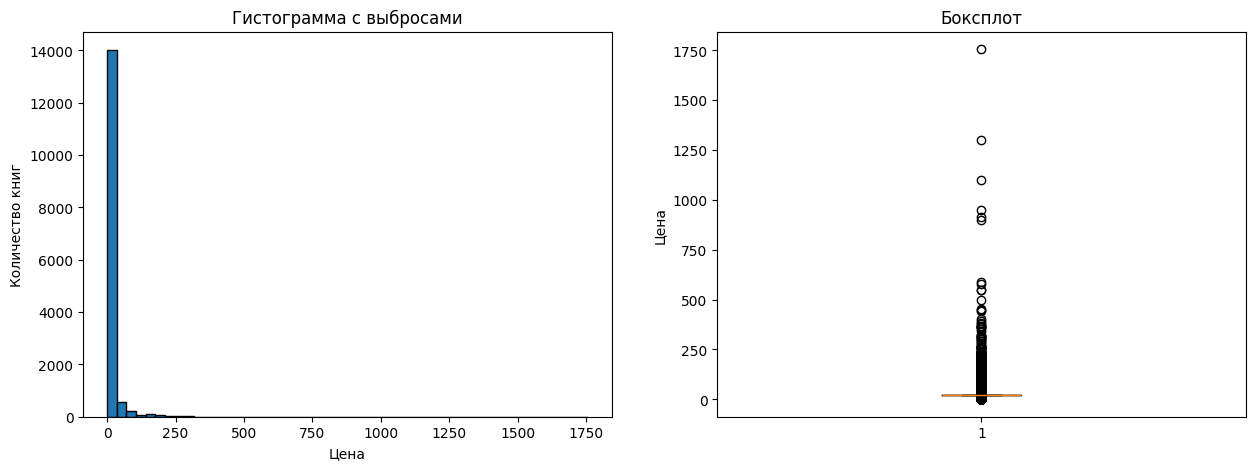

In [326]:
# Выбросы
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Гистограмма
axes[0].hist(df['list_price'], bins=50, edgecolor='black')
axes[0].set_title('Гистограмма с выбросами')
axes[0].set_xlabel('Цена')
axes[0].set_ylabel('Количество книг')

# Боксплот
axes[1].boxplot(df['list_price'])
axes[1].set_title('Боксплот')
axes[1].set_ylabel('Цена')

In [327]:
df = df.query('list_price<=350')

## Визуализация данных

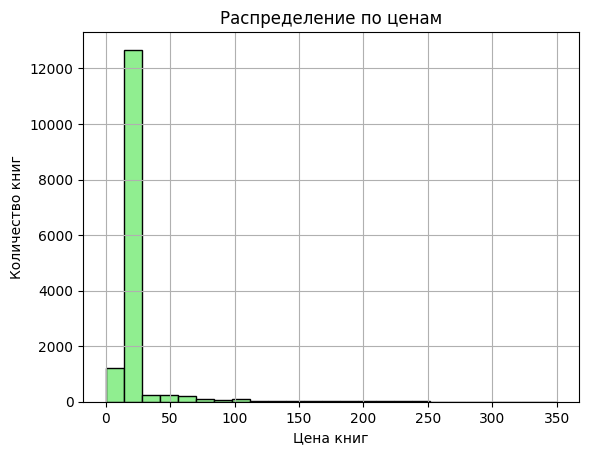

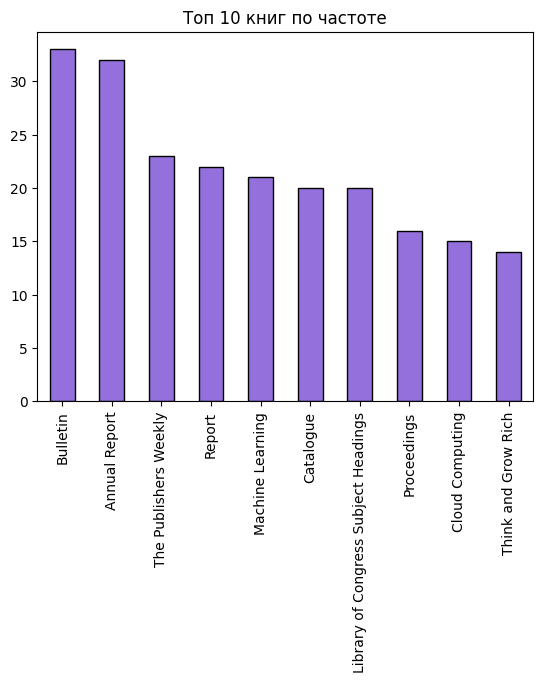

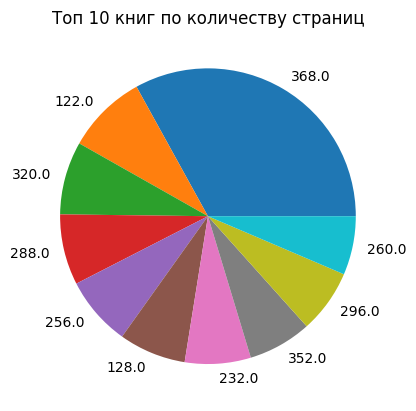

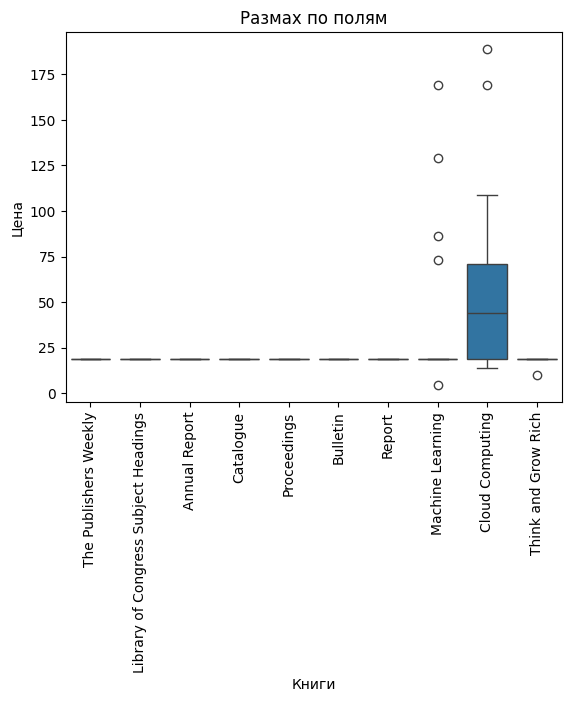

Матрица корреляций
            page_count  list_price   buyable
page_count    1.000000    0.034496 -0.136043
list_price    0.034496    1.000000  0.235105
buyable      -0.136043    0.235105  1.000000


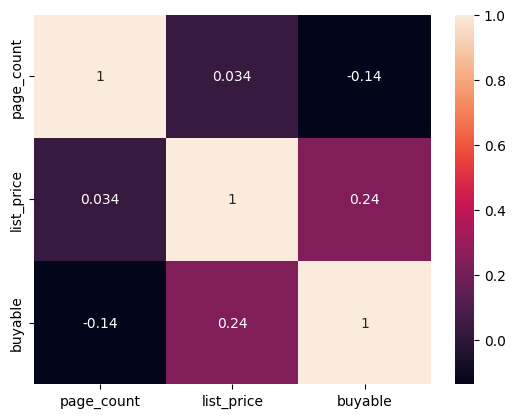

In [328]:
#1 график
df['list_price'].hist(bins=25, color='lightgreen', edgecolor='black')
plt.title("Распределение по ценам")
plt.xlabel("Цена книг")
plt.ylabel("Количество книг")
plt.show()

#2 график
df['title'].value_counts().head(10).plot(kind='bar', color='mediumpurple', edgecolor='black')
plt.title('Топ 10 книг по частоте')
plt.ylabel("")
plt.xlabel("")
plt.show()
print()

#3 график
clean_df = df[df['page_count'] > 0]
clean_df = clean_df.dropna(subset=['page_count'])
clean_df['page_count'].value_counts().head(10).plot(kind='pie')
plt.title('Топ 10 книг по количеству страниц')
plt.ylabel("")
plt.show()


#4 график
top_10_books = df['title'].value_counts().head(10).index.tolist()
df_top10 = df[df['title'].isin(top_10_books)]
sns.boxplot(x='title', y='list_price', data=df_top10)
plt.title("Размах по полям")
plt.xlabel("Книги")
plt.ylabel("Цена")
plt.xticks(rotation=90)
plt.show()

#5 график
print('Матрица корреляций')
mat_corr = df.corr(numeric_only=True)
sns.heatmap(mat_corr, annot=True)
print(mat_corr)

## Группировки и агрегации

In [329]:
categories_stats = df.groupby('categories')['list_price'].agg(['mean', 'median', 'count', 'std', 'min', 'max'])
categories_stats.columns = ['Средняя_цена', 'Медиана_цены', 'Количество_книг', 'Стд_отклонение', 'Мин_цена', 'Макс_цена']

categories_stats = categories_stats.sort_values('Средняя_цена', ascending=False)

print("Статистика цен по жанрам:")
print(categories_stats.head(10))

Статистика цен по жанрам:
                          Средняя_цена  Медиана_цены  Количество_книг  \
categories                                                              
Hospitality industry        150.000000       150.000                1   
Technology & Engineering    104.861923        98.000              104   
Medical                      78.598669        50.990              248   
Science                      47.085480        19.000              250   
Sales management             41.975000        41.975                2   
Computers                    38.242937        19.000              732   
Literary Criticism           36.716600        19.000              250   
Psychology                   36.531925        19.000              213   
Social Science               35.368817        19.000              169   
Philosophy                   34.208580        19.000              162   

                          Стд_отклонение  Мин_цена  Макс_цена  
categories                       

In [330]:
authors_per_categories = df.groupby('categories')['authors'].nunique().sort_values(ascending=False)
print(f"\nКоличество уникальных авторов по жанрам:")
print(authors_per_categories.head(10))


Количество уникальных авторов по жанрам:
categories
None                         1350
Computers                     668
Fiction                       478
Business & Economics          444
History                       313
Cooking                       273
Medical                       244
Education                     242
Literary Criticism            235
Biography & Autobiography     219
Name: authors, dtype: int64


In [331]:
categories_year_stats = df.groupby(['categories', 'published_date']).agg({
    'list_price': ['mean', 'count'],
    'title': 'nunique'
}).round(2)

print("Статистика по жанрам и годам:")
print(categories_year_stats.head(15))

Статистика по жанрам и годам:
                                       list_price         title
                                             mean count nunique
categories              published_date                         
1941                    2005                 19.0     1       1
35mm cameras            2001                 19.0     1       1
4-H clubs               1924                 19.0     1       1
ANTIQUES & COLLECTIBLES 2019                 19.0     1       1
Abbreviations, French   1906                 19.0     1       1
Ability                 1927                 19.0     1       1
Aboriginal Australians  1974                 19.0     1       1
Absolution              1878                 19.0     1       1
Abused wives            2001                 19.0     1       1
Academic freedom        2008                 19.0     1       1
Academic libraries      1839                 19.0     1       1
                        1964                 19.0     1       1
          